In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from data_utils import trim_intervals, get_data
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import GAN

In [2]:
def load_data(train_size, test_size):                                              
    keep_channels=['C3']                                                           
    trial_len = 1.5                                                                
                                                                                   
    # X, y = get_data("../data/CLASubjectA1601083StLRHand.mat", trial_len, keep_channels)
    X, y = get_data("../data/CLASubjectB1512153StLRHand.mat", trial_len, keep_channels)
                                                                                   
    X = X[y != 3]                                                                  
    y = y[y != 3]                                                                  
    # 0 is left hand                                                               
    y[y == 1] = 0                                                                  
    # 1 is right hand                                                              
    y[y == 2] = 1                                                                  
    interval_len = .45                                                             
    X = trim_intervals(X, .15, interval_len)                                       
                                                                                   
    num_channels= len(keep_channels)                                               
    d2 = np.ceil(num_channels * interval_len / 0.005).astype(int)                  
    X = X.reshape(642, d2)                                                         
                                                                                   
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size)
                                                                                   
    return X_train, X_test, y_train, y_test

In [3]:
def shuffle(X, y):                                                              
    shape = X.shape[0]                                                          
    data = np.c_[X, y]                                                          
                                                                                
    np.random.shuffle(data)                                                     
                                                                                
    return data[:shape], data[-1]  

In [6]:
def train_GAN(X_train, y_train):                                                
        gan = GAN.GAN((X_train, y_train), g_in=X_train.shape[1], g_hid=X_train.shape[1], g_out=X_train.shape[1],
                       d_in=X_train.shape[1], d_hid=X_train.shape[1], d_out=1)  
        gan.train(1000)                                                         
        return gan.generate_data(100).reshape((100,90))                         
                                                                                
                                                                                
def experiment():                                                               
    # do we really need the labels in the GAN? It never looks at them           
    sizes = [.9 , .8, .7, .6, .5, .4, .3]
#     sizes = [.9]
    for s in sizes:
        print("train size is {}".format(s))
        X, _, y, _ = load_data(s, 1.0-s)                                            
        left_X, left_y = X[y == 0], y[y == 0]                                       
        right_X, right_y = X[y == 1], y[y == 1]  
        print("left")
        train_GAN(left_X, left_y)
        print("right")
        train_GAN(right_X, right_y)

train size is 0.9
left


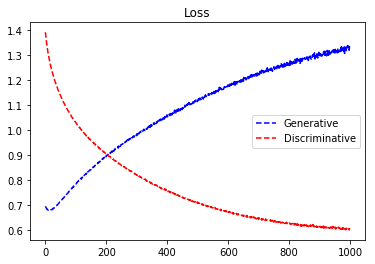

right


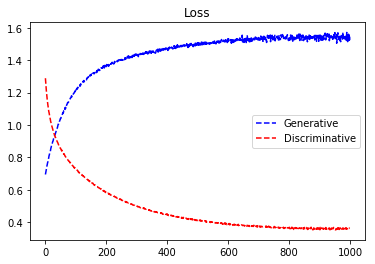

train size is 0.8
left


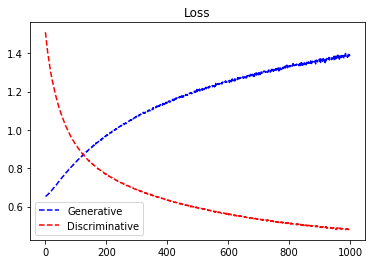

right


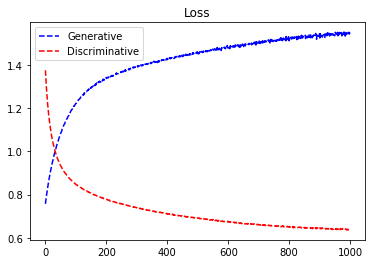

train size is 0.7
left


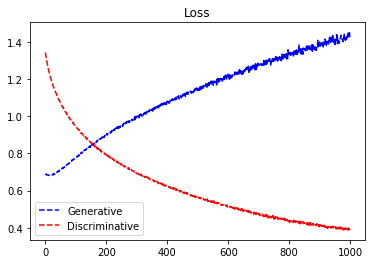

right


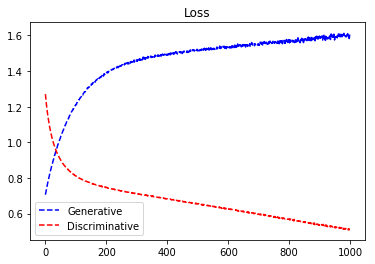

train size is 0.6
left


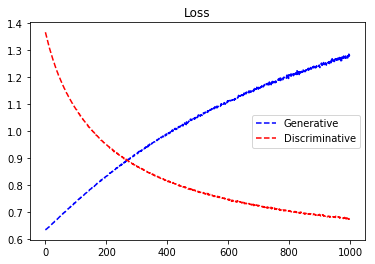

right


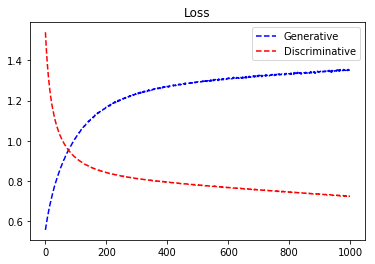

train size is 0.5
left


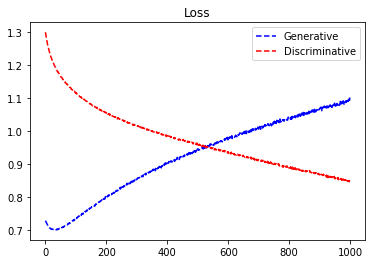

right


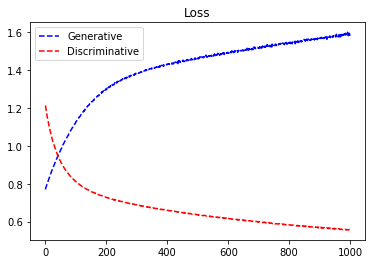

train size is 0.4
left


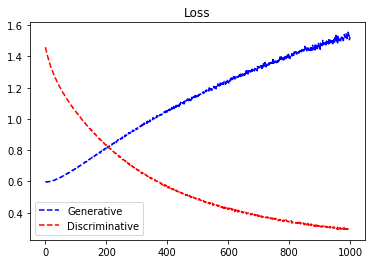

right


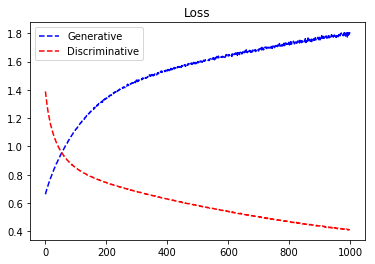

train size is 0.3
left


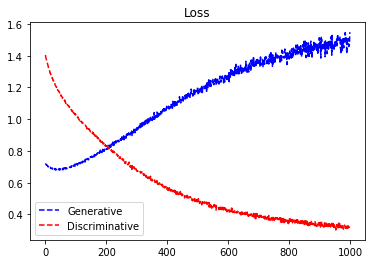

right


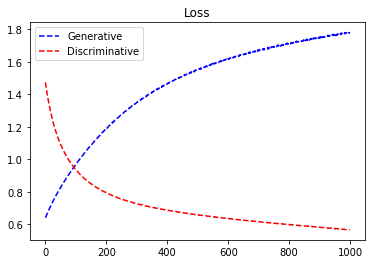

In [7]:
experiment()